In [1]:
# Import essential libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
# Read data

df = pd.read_csv('/Users/aarparlu/Downloads/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Checking nulls percentage

for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) * 100
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [4]:
# Checking nulls sum

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# Fill the missing data of columns with median and mode values

def impute_median(series):
    return series.fillna(series.median()) 

In [6]:
df.budget = df['budget'].transform(impute_median)
df.gross = df['gross'].transform(impute_median)
df.score = df['score'].transform(impute_median)
df.votes = df['votes'].transform(impute_median)
df.runtime = df['runtime'].transform(impute_median)

In [7]:
df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [8]:
df['rating'].fillna(str(df['rating'].mode().values[0]), inplace = True)
df['released'].fillna(str(df['released'].mode().values[0]), inplace = True)
df['writer'].fillna(str(df['writer'].mode().values[0]), inplace = True)
df['star'].fillna(str(df['star'].mode().values[0]), inplace = True)
df['country'].fillna(str(df['country'].mode().values[0]), inplace = True)
df['company'].fillna(str(df['company'].mode().values[0]), inplace = True)

In [9]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [10]:
#Change datatype of the columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [12]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

<AxesSubplot:>

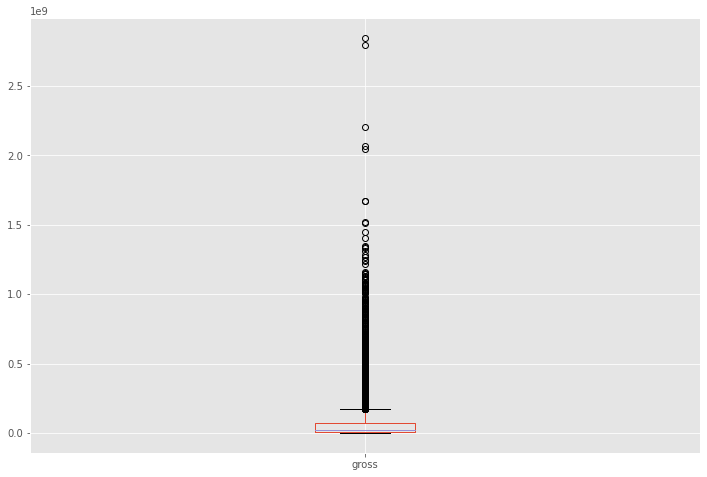

In [13]:
# Checking Outliers

df.boxplot(column=['gross'])

In [14]:
# Removing Duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,20205757,Universal Pictures,90.0
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000,20205757,Cactus Blue Entertainment,90.0
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,20205757,Embi Productions,104.0
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000,20205757,Universal Pictures,120.0


In [15]:
# Changing date format

df['released_date'] = df['released'].apply(lambda x: x.split('(')[0])

In [16]:
df.drop(['released'], axis = 1, inplace = True)

In [17]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980"


In [18]:
df['yearcorrect'] = df['released_date'].astype(str).str[-5:]

In [19]:
df['yearcorrect'] = df['yearcorrect'].astype('int64')

In [20]:
df.drop(['year'], axis = 1, inplace = True)

In [22]:
df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,yearcorrect
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",1980
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",1980
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",1980
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",1980


In [28]:
df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,year
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",1980
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",1980
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",1980
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",1980


In [29]:
# Order data to visualise properly

df1 = df.sort_values(by=['gross'], ascending=False)

In [30]:
df1.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,year
5445,Avatar,PG-13,Action,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009",2009
7445,Avengers: Endgame,PG-13,Action,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019",2019
3045,Titanic,PG-13,Drama,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997",1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015",2015
7244,Avengers: Infinity War,PG-13,Action,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018",2018


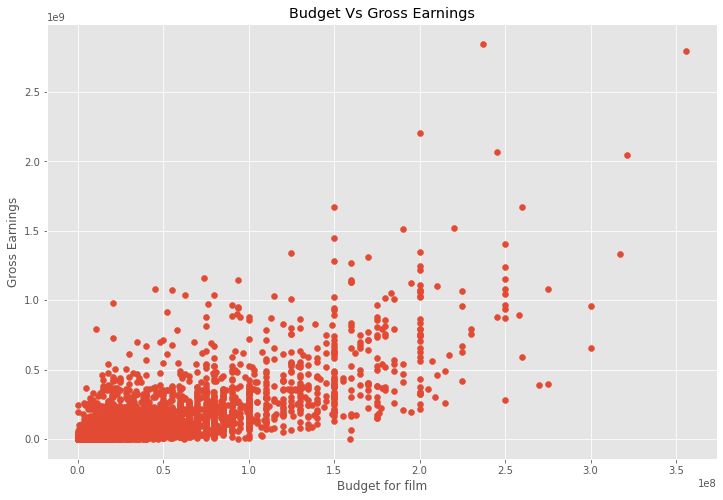

In [31]:
# Scatter plot for budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

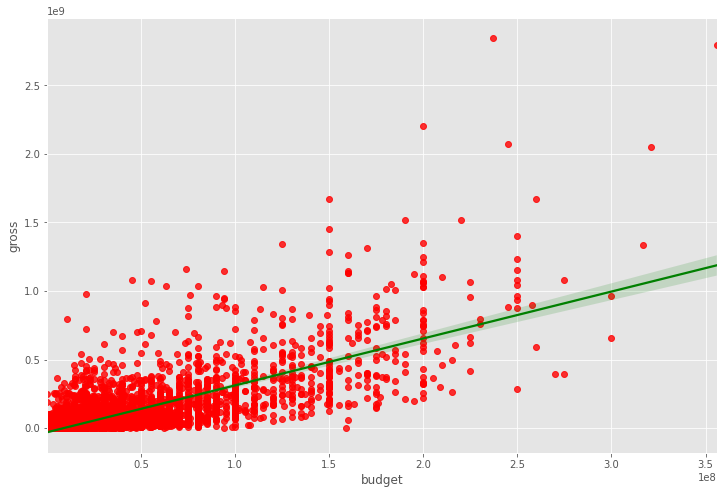

In [32]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "green"})

<AxesSubplot:xlabel='score', ylabel='gross'>

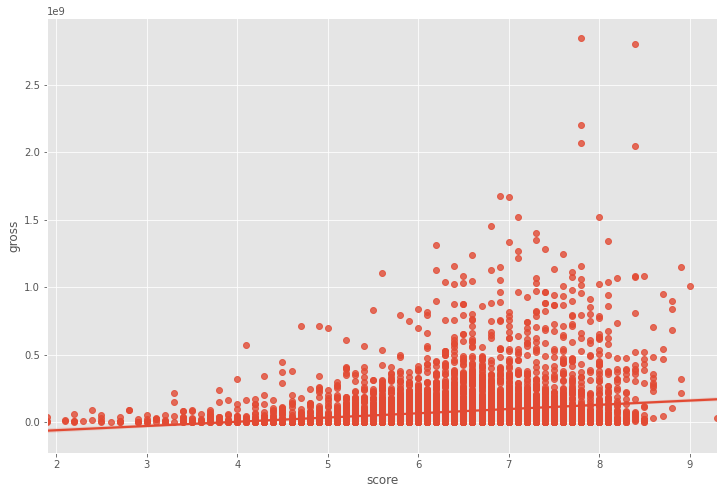

In [33]:
#Plot score vs gross

sns.regplot(x="score", y="gross", data=df)

In [34]:
# Find correlation matrix between all numeric columns

df.corr(method = 'pearson')

,score,votes,budget,gross,runtime,year
score,1.000000,0.409157,0.061931,0.185563,0.399407,0.106221
votes,0.409157,1.000000,0.460968,0.632120,0.309151,0.217995
budget,0.061931,0.460968,1.000000,0.745881,0.273371,0.284125
gross,0.185563,0.632120,0.745881,1.000000,0.244380,0.252759
runtime,0.399407,0.309151,0.273371,0.244380,1.000000,0.120573
year,0.106221,0.217995,0.284125,0.252759,0.120573,1.000000


In [36]:
df.corr(method = 'kendall')

,score,votes,budget,gross,runtime,year
score,1.000000,0.300087,-0.001776,0.084530,0.283447,0.073615
votes,0.300087,1.000000,0.268941,0.530052,0.198120,0.325222
budget,-0.001776,0.268941,1.000000,0.376115,0.192008,0.180225
gross,0.084530,0.530052,0.376115,1.000000,0.165143,0.187030
runtime,0.283447,0.198120,0.192008,0.165143,1.000000,0.096940
year,0.073615,0.325222,0.180225,0.187030,0.096940,1.000000


In [37]:
df.corr(method = 'spearman')

,score,votes,budget,gross,runtime,year
score,1.000000,0.428088,-0.002932,0.123997,0.399632,0.107881
votes,0.428088,1.000000,0.381894,0.722490,0.289986,0.462011
budget,-0.002932,0.381894,1.000000,0.520018,0.270410,0.250704
gross,0.123997,0.722490,0.520018,1.000000,0.241429,0.274110
runtime,0.399632,0.289986,0.270410,0.241429,1.000000,0.142848
year,0.107881,0.462011,0.250704,0.274110,0.142848,1.000000


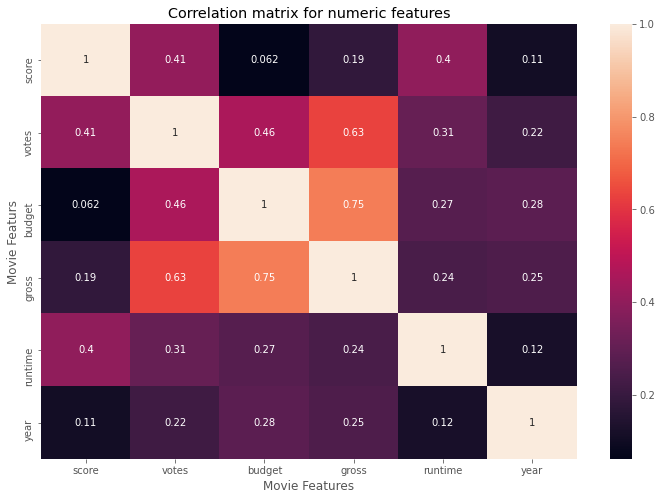

In [38]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Featurs')
plt.show()
plt.show()

In [39]:
# Find correlation between company and gross

df_numerized = df1

for cols in df_numerized.columns:
    if(df_numerized[cols].dtype == 'object'):
        df_numerized[cols] = df_numerized[cols].astype('category')
        df_numerized[cols] = df_numerized[cols].cat.codes
        
df_numerized

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,year
5445,533,5,0,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,610,2009
7445,535,5,0,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,153,2019
3045,6896,5,6,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,616,1997
6663,5144,5,0,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,612,2015
7244,536,5,0,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,161,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,6.5,5200.0,730,1123,2319,54,20500000,1400,477,103.0,986,2001
7625,6720,6,4,5.7,320.0,2546,2565,1915,55,20500000,790,2308,104.0,1013,2019
7580,4664,3,5,5.2,735.0,1445,2203,2278,55,20500000,682,1992,93.0,1627,2020
2417,3406,6,6,7.3,5100.0,33,1718,2563,27,11900000,596,796,134.0,71,1993


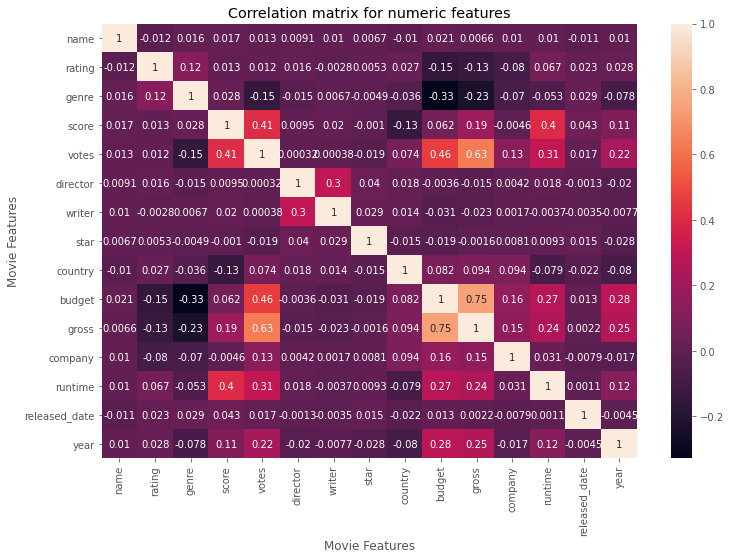

In [40]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()
plt.show()

In [42]:
df_numerized.corr()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,year
name,1.000000,-0.012441,0.016355,0.017105,0.013056,0.009079,0.010018,0.006749,-0.010425,0.020921,0.006601,0.010369,0.010335,-0.010997,0.010379
rating,-0.012441,1.000000,0.123465,0.013276,0.012286,0.016255,-0.002795,0.005314,0.026930,-0.148543,-0.130478,-0.079626,0.066597,0.022764,0.028017
genre,0.016355,0.123465,1.000000,0.027965,-0.145291,-0.015258,0.006746,-0.004856,-0.035896,-0.328484,-0.233385,-0.070013,-0.052719,0.029215,-0.078120
score,0.017105,0.013276,0.027965,1.000000,0.409157,0.009540,0.019745,-0.001006,-0.134557,0.061931,0.185563,-0.004570,0.399407,0.042792,0.106221
votes,0.013056,0.012286,-0.145291,0.409157,1.000000,0.000316,0.000379,-0.019371,0.073522,0.460968,0.632120,0.130562,0.309151,0.016994,0.217995
director,0.009079,0.016255,-0.015258,0.009540,0.000316,1.000000,0.299512,0.039715,0.017926,-0.003584,-0.014758,0.004250,0.017611,-0.001289,-0.020399
writer,0.010018,-0.002795,0.006746,0.019745,0.000379,0.299512,1.000000,0.028745,0.014409,-0.031050,-0.023028,0.001665,-0.003715,-0.003491,-0.007694
star,0.006749,0.005314,-0.004856,-0.001006,-0.019371,0.039715,0.028745,1.000000,-0.014749,-0.018814,-0.001640,0.008072,0.009253,0.015370,-0.028117
country,-0.010425,0.026930,-0.035896,-0.134557,0.073522,0.017926,0.014409,-0.014749,1.000000,0.081816,0.093622,0.094210,-0.079305,-0.021675,-0.080221
budget,0.020921,-0.148543,-0.328484,0.061931,0.460968,-0.003584,-0.031050,-0.018814,0.081816,1.000000,0.745881,0.164213,0.273371,0.012554,0.284125


In [44]:
pd.set_option('display.max_rows', None)

In [45]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name           name             1.000000
               rating          -0.012441
               genre            0.016355
               score            0.017105
               votes            0.013056
               director         0.009079
               writer           0.010018
               star             0.006749
               country         -0.010425
               budget           0.020921
               gross            0.006601
               company          0.010369
               runtime          0.010335
               released_date   -0.010997
               year             0.010379
rating         name            -0.012441
               rating           1.000000
               genre            0.123465
               score            0.013276
               votes            0.012286
               director         0.016255
               writer          -0.002795
               star             0.005314
               country          0.026930
               b

In [46]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre          budget          -0.328484
budget         genre           -0.328484
gross          genre           -0.233385
genre          gross           -0.233385
rating         budget          -0.148543
budget         rating          -0.148543
votes          genre           -0.145291
genre          votes           -0.145291
score          country         -0.134557
country        score           -0.134557
rating         gross           -0.130478
gross          rating          -0.130478
year           country         -0.080221
country        year            -0.080221
company        rating          -0.079626
rating         company         -0.079626
country        runtime         -0.079305
runtime        country         -0.079305
genre          year            -0.078120
year           genre           -0.078120
company        genre           -0.070013
genre          company         -0.070013
               runtime         -0.052719
runtime        genre           -0.052719
genre          c

In [47]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes          gross            0.632120
gross          votes            0.632120
               budget           0.745881
budget         gross            0.745881
name           name             1.000000
star           star             1.000000
runtime        runtime          1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
genre          genre            1.000000
rating         rating           1.000000
released_date  released_date    1.000000
year           year             1.000000
dtype: float64

In [48]:
# Votes and budget have the highest correlation to gross earnings 

# Company has low correlation

In [49]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56511627563
Universal Pictures           52721313125
Columbia Pictures            43008941346
Paramount Pictures           40513813172
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9270641619
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [50]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                                            year            
"DIA" Productions GmbH & Co. KG                    2003    44350926
"Weathering With You" Film Partners                2020   193457467
.406 Production                                    1997       10580
1+2 Seisaku Iinkai                                 2000     1196218
10 West Studios                                    2010      814906
120 Films                                          2002     6479328
120dB Films                                        2009       26676
                                                   2017      368372
13 Productions                                     2001       25461
1492 Pictures                                      1996   129832389
                                                   1999    87423861
1818 Productions                                   1983    12232628
19 Entertainment                                   2003     4928883
1978 Films                                         2017    40656399
1984 Private Defense Contractors                   2014    58834384
1992 Number Four Limited Partnership               1995     4686937
2 Loop Films                                       2003      264349
2.0 Entertainment                                  2019   122810399
2.4.7. Films                                       2008    22783978
2003 Productions                                   2005    69424389
20th Century Studios                               2020   111105497
21 Laps Entertainment                              2014    41296320
                                                   2018    41142379
21st Century Film Corporation                      1989     3953745
                                                   1990     7658401
21st Century Films                                 1994     1702394
25th Hour Productions                              2003    23932055
26 Films                                           2009    20458873
2929 Productions                                   2008    14007547
                                                   2009    21946121
                                                   2015     5092129
2DUX²                                              2017      678150
                                                   2018   197744377
3 Arts Entertainment                               1996    60209334
                                                   1997    75812433
                                                   2001    71186502
                                                   2011      649626
                                                   2013     3909596
                                                   2014   161459297
                                                   2015    36606743
                                                   2019    22386555
3 Miles Apart Productions Ltd.                     1999     8408835
3311 Productions                                   2013     3114953
                                                   2017     5042014
360 Pictures                                       2007     9669758
391 Productions                                    1998     1960216
                                                   2000       92442
3B Productions                                     1999    20205757
                                                   2003      167999
3Mark Entertainment                                2002     4760014
4 1/2 Film                                         2006     1297260
4 Kids Entertainment                               2000   133949270
40 Acres & A Mule Filmworks                        1986     7137502
                                                   1989    37295445
                                                   1995    15403436
                                                   1999    34573780
                                                   2000    27728118
                                                  

In [52]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3168551343
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2019    2932757449
                       2006    2918469353
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
                       2005    2773019821
Name: gross, dtype: int64

In [53]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56511627563
Universal Pictures           52721313125
Columbia Pictures            43008941346
Paramount Pictures           40513813172
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9270641619
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [ ]:
sns.swarmplot(x="rating", y="gross", data=df)

In [ ]:
sns.stripplot(x="rating", y="gross", data=df)